In [1]:
import pandas as pd
import numpy as np
import os
from env import host, user, password
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import env
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import scipy
import christian_wrangle
import sklearn.linear_model
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")
import wrangle
import viz_explore
import scipy.stats as stats

In [2]:
df, train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, X_train_scaled, y_train_scaled, validate_scaled, X_validate_scaled, y_validate_scaled, test_scaled, X_test_scaled, y_test_scaled=christian_wrangle.wrangle_zillow()


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39574 entries, 2 to 77573
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   parcelid            39574 non-null  int64   
 1   bathrooms           39574 non-null  float64 
 2   bedrooms            39574 non-null  float64 
 3   condition           39574 non-null  float64 
 4   sq_ft               39574 non-null  float64 
 5   full_baths          39574 non-null  float64 
 6   latitude            39574 non-null  float64 
 7   longitude           39574 non-null  float64 
 8   lot_size            39574 non-null  float64 
 9   census_tract        39574 non-null  float64 
 10  city_id             39574 non-null  float64 
 11  zip                 39574 non-null  float64 
 12  rooms               39574 non-null  float64 
 13  structure_value     39574 non-null  float64 
 14  tax_value           39574 non-null  float64 
 15  year_assessed       39574 non-null  

In [4]:
scaler = MinMaxScaler()

In [5]:
cols_to_cluster = ['sq_ft', 'tax_rate','longitude']

In [6]:
kmeans_long = KMeans(n_clusters = 4, random_state=5)

In [7]:
 kmeans_long.fit(train_scaled[cols_to_cluster])

KMeans(n_clusters=4, random_state=5)

In [8]:
train_scaled['cluster'] = kmeans_long.predict(train_scaled[cols_to_cluster])

In [9]:
train_scaled.head()

,bathrooms,bedrooms,condition,sq_ft,full_baths,latitude,longitude,lot_size,rooms,structure_value,...,sq_ft_per_bathroom,sq_ft_per_bedroom,sq_ft_per_room,has_half_bath,tax_rate,price_per_sq_ft,Los_Angeles,Orange,Ventura,cluster
0,0.333333,0.333333,0.454545,0.515721,0.5,0.573098,0.520347,0.001129,0.000000,0.108081,...,0.494556,0.366901,0.587500,0.0,0.544719,0.161422,1.0,0.0,0.0,3
1,1.000000,1.000000,0.454545,0.890830,1.0,0.076040,0.966372,0.001715,0.000000,0.494168,...,0.494137,0.254749,0.907011,0.0,0.140196,0.492855,0.0,1.0,0.0,1
2,0.333333,0.666667,0.454545,0.326638,0.5,0.269144,0.773711,0.000927,0.524228,0.177819,...,0.313233,0.142510,0.074527,0.0,0.564074,0.355375,0.0,1.0,0.0,2
3,0.333333,0.666667,0.454545,0.455459,0.5,0.343177,0.629829,0.000771,0.000000,0.212952,...,0.436767,0.193685,0.536170,0.0,0.580565,0.346178,1.0,0.0,0.0,0
4,0.333333,0.333333,0.636364,0.211354,0.5,0.300060,0.686613,0.001390,0.000000,0.239747,...,0.202680,0.185532,0.328246,0.0,0.413904,0.602933,1.0,0.0,0.0,2


In [10]:
import re, seaborn as sns
import numpy as np
# from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# from sklearn import *


In [11]:
three_d_graph_df = train_scaled[cols_to_cluster]
three_d_graph_df.columns

Index(['sq_ft', 'tax_rate', 'longitude'], dtype='object')

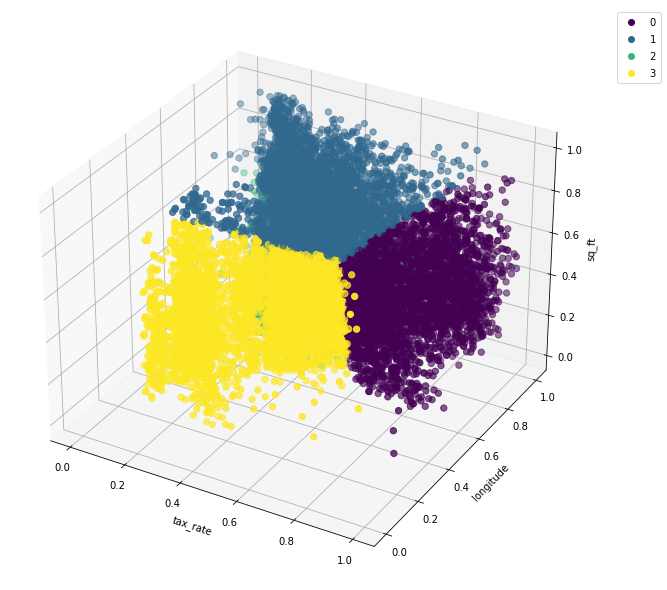

In [12]:
# The following command will make the graphic interactive
# but it creates problems for subsequent graphics and should be commented out
# until it's being used




#%matplotlib notebook



# assigning the graphing data
x = three_d_graph_df.tax_rate
y = three_d_graph_df.longitude
z = three_d_graph_df.sq_ft
 # axes instance
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
fig.add_axes(ax)
# get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
t = kmeans_long.predict(train_scaled[cols_to_cluster])#.drop(columns=['loc_age_cluster']))
# plot
# the x,y,z labels might need to be specific...
sc = ax.scatter(x, y, z, s=40, c=t, marker='o')#, cmap=t, alpha=1)
ax.set_xlabel('tax_rate')
ax.set_ylabel('longitude')
ax.set_zlabel('sq_ft')
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
# save
# plt.savefig("scatter_hue", bbox_inches='tight')

- #3. yellow = medium to higher taxrate all sizes east to mid west
- #2 green = low to medium tax_rate  smaller to larger closer to the coast
- #0 purple = low to medium taxrate , smaller sqf closer to the coast
- #1 blue = larger sqf,  low to medium tax rate mid west an closer to the coast

In [13]:
#sns.pairplot(train_scaled[['logerror','sq_ft','longitude', 'tax_rate']], hue='logerror')

In [14]:
def correlat(df):
    plt.figure(figsize=(20,8))
    df.corr()['logerror'].sort_values(ascending= False).plot(kind ='bar')
    
    return correlat

In [15]:
#correlat(train_scaled)

In [16]:
train['cluster'] = kmeans_long.predict(train_scaled[cols_to_cluster])

<AxesSubplot:xlabel='cluster', ylabel='logerror'>

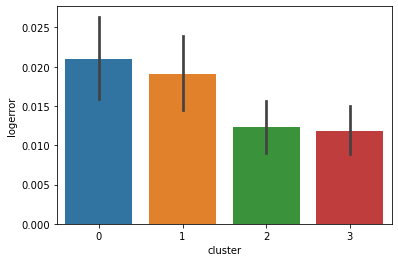

In [17]:
sns.barplot(x='cluster',y='logerror',data=train)

#sns.barplot(x='county',y=df['logerror'].abs(),data=train_scaled,hue='cluster')

<AxesSubplot:xlabel='cluster', ylabel='tax_rate'>

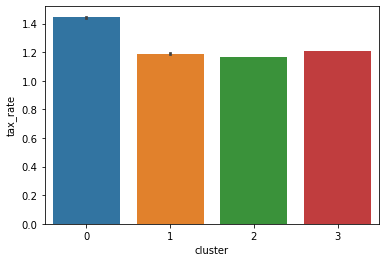

In [18]:
sns.barplot(x='cluster',y='tax_rate',data=train)

<AxesSubplot:xlabel='cluster', ylabel='sq_ft'>

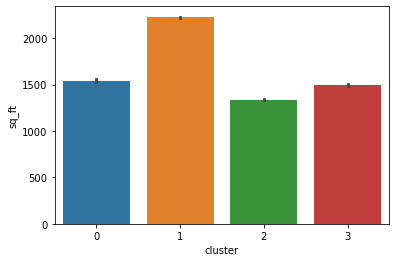

In [19]:
sns.barplot(x='cluster',y='sq_ft',data=train)

<AxesSubplot:xlabel='county', ylabel='cluster'>

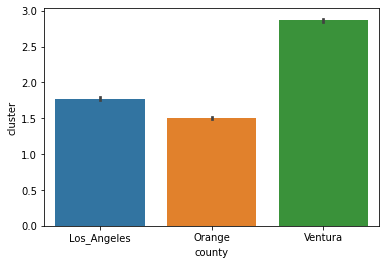

In [20]:
sns.barplot(x='county',y='cluster',data=train)

In [21]:
train_scaled.columns

Index(['bathrooms', 'bedrooms', 'condition', 'sq_ft', 'full_baths', 'latitude',
       'longitude', 'lot_size', 'rooms', 'structure_value', 'tax_value',
       'year_assessed', 'land_value', 'tax_amount', 'logerror', 'age',
       'sq_ft_per_bathroom', 'sq_ft_per_bedroom', 'sq_ft_per_room',
       'has_half_bath', 'tax_rate', 'price_per_sq_ft', 'Los_Angeles', 'Orange',
       'Ventura', 'cluster'],
      dtype='object')

In [22]:
train.columns

Index(['parcelid', 'bathrooms', 'bedrooms', 'condition', 'sq_ft', 'full_baths',
       'latitude', 'longitude', 'lot_size', 'census_tract', 'city_id', 'zip',
       'rooms', 'structure_value', 'tax_value', 'year_assessed', 'land_value',
       'tax_amount', 'logerror', 'county', 'age', 'sq_ft_per_bathroom',
       'sq_ft_per_bedroom', 'sq_ft_per_room', 'has_half_bath', 'age_bin',
       'tax_rate', 'price_per_sq_ft', 'Los_Angeles', 'Orange', 'Ventura',
       'cluster'],
      dtype='object')

<AxesSubplot:xlabel='county', ylabel='logerror'>

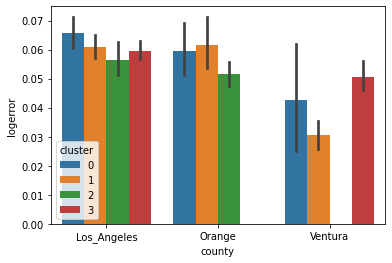

In [23]:
sns.barplot(x='county',y=train['logerror'].abs(),data=train,hue='cluster')

<AxesSubplot:xlabel='county', ylabel='logerror'>

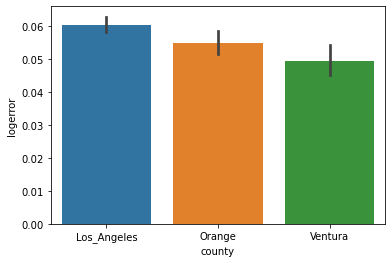

In [24]:
sns.barplot(x = 'county', y = train['logerror'].abs(), data=train)


<AxesSubplot:xlabel='county', ylabel='logerror'>

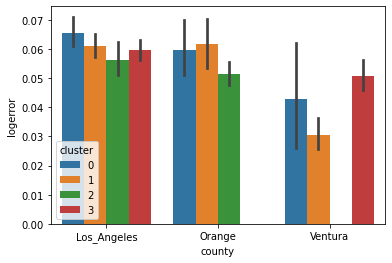

In [25]:
sns.barplot(x='county',y=df['logerror'].abs(),data=train,hue='cluster')


## Hypothesis testing

- H0 : The mean logerror is the same for every cluster
- H1 : The mean logerror is not the same for every cluster

In [26]:
train['cluster'] = np.where(train.cluster == 0,'small_low_to_medtax',np.where(train.cluster == 1,'larger_lo_to_medtax',\
        np.where(train.cluster == 2, 'all_size_low_to_midtax',\
                 'all_size_mid_to_hg_tax')))

In [27]:
f, p = stats.f_oneway(train[train.cluster == 'small_low_to_medtax'].logerror,train[train.cluster == 'larger_lo_to_medtax'].logerror,\
                      train[train.cluster == 'all_size_low_to_midtax'].logerror, train[train.cluster == 'all_size_mid_to_hg_tax'].logerror)
f, p

(4.989313501583566, 0.0018483472087343846)

In [29]:
# Setting our alpha and returning a statemtent on the validity of the ANOVA test by comparing alpha to the resulting p-value

alpha = 0.05
if p < alpha:
    print("We reject H_O that the mean log error is the same for every cluster")
else:
    print("We fail to reject $H_{0}$")

We reject H_O that the mean log error is the same for every cluster


## Key Takeaways
- larger and smaller properties closer to the west have the highest logerror 
- Tax rate for larger Properties are higher
- properties with medium to high tax rates are located in LA and Ventura counties
- Log error is higher in LA and Orange counties than in Ventura county
